In [ ]:
# Установка библиотек
!pip install bs4
!pip install openpyxl
!pip install openpyxl==3.1.2

  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1272 sha256=3f128a37e6b922d263f80f1d77ff2a2a735992eba72daa851aaba647ffec4c7b
  Stored in directory: /root/.cache/pip/wheels/73/2b/cb/099980278a0c9a3e57ff1a89875ec07bfa0b6fcbebb9a8cad3
Successfully built bs4

[notice] A new release of pip is available: 23.0.1 -> 23.3
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 23.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


In [ ]:
!pip install beautifulsoup4


[notice] A new release of pip is available: 23.0.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


In [2]:
# Импорт библиотек
import requests 
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import time

In [ ]:
import requests

url = 'https://elementy.ru/novosti_nauki'
response = requests.get(url)
response

<Response [200]>

In [ ]:
# распарсили страничку в дерево
tree = bs(response.content, 'html.parser')

In [ ]:
news = tree.find_all('div', {'class': "img_block32"})

In [ ]:
news[0]

<div class="img_block32">
<a class="nohover" href="/novosti_nauki/434152/Neandertaltsy_okhotilis_na_peshchernykh_lvov_i_ispolzovali_ikh_shkury">
<div class="title">Неандертальцы охотились на пещерных львов и использовали их шкуры</div>
<div class="ib_img_rs"><span><img alt="Неандертальцы из Зигсдорфа разделывают пещерного льва, убитого деревянным копьем" src="images/news/lion_hunting_by_neanderthals_logo_390.jpg"/></span></div>
<div class="ib_text">
<div class="brief"><p>Старый пещерный лев был убит и разделан неандертальцами на территории нынешней Германии 48 000 лет назад. Судя по вмятине на ребре, льва ударили в живот деревянным копьем, подкравшись к хищнику сзади, пока он отдыхал, лежа на правом боку. Копье проткнуло льва почти насквозь и уперлось в третье правое ребро изнутри. Это самое раннее свидетельство охоты человека на льва.</p></div>
</div>
</a>
<div class="cl"></div>
<div class="sublink"><span class="date">20.10</span> <span class="break">•</span> <a href="/novosti_nauki/t

In [ ]:
title = news[0].a.div.text.replace('\xa0', '')
title

'Неандертальцы охотились на пещерных львов ииспользовали их шкуры'

In [ ]:
# Ищем элемент <span> с классом "date" и получаем его текст
date = news[0].find('span', class_='date').text
date

'20.10'

In [ ]:
brief = news[0].find('div', class_='brief').text.replace('\xa0', '')
brief

'Старый пещерный лев был убит и разделан неандертальцами на территории нынешней Германии 48000лет назад. Судя по вмятине на ребре, льва ударили вживот деревянным копьем, подкравшись кхищнику сзади, пока он отдыхал, лежа на правом боку. Копье проткнуло льва почти насквозь и уперлось втретье правое ребро изнутри. Это самое раннее свидетельство охоты человека на льва.'

In [ ]:
# Ищем все элементы <a> внутри объекта 
links = news[0].find_all('a')

# Получаем тексты из каждого найденного элемента
name1 = links[1].text
name2 = links[2].text

In [ ]:
name1, name2

('Александр Марков', 'Антропология')

In [ ]:
info

[{'Title': 'Неандертальцы охотились на пещерных львов ииспользовали их шкуры',
  'Date': '20.10',
  'Brief': 'Старый пещерный лев был убит и разделан неандертальцами на территории нынешней Германии 48000лет назад. Судя по вмятине на ребре, льва ударили вживот деревянным копьем, подкравшись кхищнику сзади, пока он отдыхал, лежа на правом боку. Копье проткнуло льва почти насквозь и уперлось втретье правое ребро изнутри. Это самое раннее свидетельство охоты человека на льва.',
  'Author': 'Александр Марков',
  'Bloc': 'Антропология',
  'Link': '/novosti_nauki/434152/Neandertaltsy_okhotilis_na_peshchernykh_lvov_i_ispolzovali_ikh_shkury'},
 {'Title': 'Литиевое месторождение вдревней кальдере вулкана Йеллоустон образовалось врезультате повторной магматической активизации',
  'Date': '18.10',
  'Brief': 'Геологи из США и Новой Зеландии описали ранее неизвестный процесс естественного обогащения литием вулканогенно-осадочных толщ водной из древних кальдер вулкана Йеллоустон. По оценкам авторов,

In [ ]:
def get_page(p):
    url = 'https://elementy.ru/novosti_nauki?page={0}'.format(p)


    response = requests.get(url)
    tree = bs(response.content, 'html.parser')

    news = tree.find_all('div', {'class': "img_block32"})

    info = []

    for new in news:
        title = new.a.div.text.replace('\xa0', '')
        date = new.find('span', class_='date').text
        brief = new.find('div', class_='brief').text.replace('\xa0', '')

        links = new.find_all('a')
        author = links[1].text
        bloc = links[2].text

        link = 'https://elementy.ru' + new.a.get('href')
        
        row = {
            'Title': title,
            'Date' : date,
            'Brief' : brief,
            'Author': author,
            'Bloc' : bloc,
            'Link' : link
                }

        info.append(row)

    return info


In [ ]:
info = []

count = 0
for p in range(0, 206):
    count += 1

    try:
        info.extend(get_page(p))
        time.sleep(np.random.choice([3, 5, 7]))

    except:
        pass

    if count % 10 == 0:
        df = pd.DataFrame(info)
        df.to_csv('news.csv', index=False)

In [46]:
df = pd.read_csv('news.csv')

In [77]:
df.head(5)

,Title,Date,Brief,Author,Bloc,Link
0,Неандертальцы охотились на пещерных львов иисп...,20.10,Старый пещерный лев был убит и разделан неанде...,Александр Марков,Антропология,https://elementy.ru/novosti_nauki/434152/Neand...
1,Литиевое месторождение вдревней кальдере вулка...,18.10,Геологи из США и Новой Зеландии описали ранее ...,Владислав Стрекопытов,Геология,https://elementy.ru/novosti_nauki/434151/Litie...
2,Нобелевская премия по физике — 2023,15.10,Нобелевская премия по физике за 2023год была п...,Игорь Иванов,Нобелевские премии,https://elementy.ru/novosti_nauki/434150/Nobel...
3,Уровень насилия на Ближнем Востоке вбронзовом ...,11.10,"Изучение скелетов 3539людей, живших 14000–2400...",Александр Марков,Археология,https://elementy.ru/novosti_nauki/434149/Urove...
4,"Судя по следам, гигантские нелетающие форорако...",10.10,Аргентинские палеонтологи обнаружили окаменевш...,Анна Новиковская,Палеонтология,https://elementy.ru/novosti_nauki/434148/Sudya...


In [48]:
df.shape

(3200, 6)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   3200 non-null   object
 1   Date    3200 non-null   object
 2   Brief   3200 non-null   object
 3   Author  3194 non-null   object
 4   Bloc    3200 non-null   object
 5   Link    3200 non-null   object
dtypes: object(6)
memory usage: 150.1+ KB


In [50]:
# Вывод строк с пропусками в столбце "Author"
df_with_missing_author = df[df['Author'].isnull()]

In [51]:
df_with_missing_author

,Title,Date,Brief,Author,Bloc,Link
1182,Двухфотонный пик исчез вновых данных коллайдера,05.08.2016,\nНа конференции ICHEP2016 обнародованы новые ...,NaN,Игорь Иванов,https://elementy.ru/novosti_nauki/432805/Dvukh...
1221,Теоретики продолжают искать объяснения двухфот...,27.04.2016,"\nУ двухфотонного пика, намеки на который прос...",NaN,Игорь Иванов,https://elementy.ru/novosti_nauki/432743/Teore...
1239,Загадочный двухфотонный пик проступает всё сил...,23.03.2016,\nВ физике элементарных частиц назревает либо ...,NaN,Игорь Иванов,https://elementy.ru/novosti_nauki/432718/Zagad...
1382,LHCb подтверждает еще одно отклонение враспада...,20.07.2015,\nКоллаборация LHCb обнародовала еще один любо...,NaN,Игорь Иванов,https://elementy.ru/novosti_nauki/432533/LHCb_...
1465,Поиски суперсимметрии на коллайдере принесли н...,17.03.2015,"\nДве коллаборации, работающие на Большом адро...",NaN,Игорь Иванов,https://elementy.ru/novosti_nauki/432428/Poisk...
1737,Суперсимметрия всвете данныхLHC: что делать да...,01.07.2013,\nРезультаты первых трех лет работы Большого а...,NaN,Игорь Иванов,https://elementy.ru/novosti_nauki/432038/Super...


In [52]:
# Удаление строк с пропусками в столбце "Author"
df_copy = df.copy()
df_copy = df_copy.dropna(subset=['Author'])


In [53]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3194 entries, 0 to 3199
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   3194 non-null   object
 1   Date    3194 non-null   object
 2   Brief   3194 non-null   object
 3   Author  3194 non-null   object
 4   Bloc    3194 non-null   object
 5   Link    3194 non-null   object
dtypes: object(6)
memory usage: 174.7+ KB


Изменим тип данных некоторых столбцов, чтобы дальше было удобнее работать с нашим DF

In [54]:
df_copy['Date'].head(3)

0    20.10
1    18.10
2    15.10
Name: Date, dtype: object

In [55]:
# Функция для изменения значений в столбце "Date"
def modify_date(date):
    parts = date.split('.')
    if len(parts) == 2:
        return f"{date}.2023"
    return date

# Применение функции к столбцу "Date"
df_copy['Date'] = df_copy['Date'].apply(modify_date)


In [56]:
df_copy['Date'].head(3)

0    20.10.2023
1    18.10.2023
2    15.10.2023
Name: Date, dtype: object

In [57]:
# Изменение типа данных столбца "Date" на datetime64
df_copy['Date'] = pd.to_datetime(df_copy['Date'], format='%d.%m.%Y')


In [58]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3194 entries, 0 to 3199
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Title   3194 non-null   object        
 1   Date    3194 non-null   datetime64[ns]
 2   Brief   3194 non-null   object        
 3   Author  3194 non-null   object        
 4   Bloc    3194 non-null   object        
 5   Link    3194 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 174.7+ KB


In [59]:
df_copy.head(5)

,Title,Date,Brief,Author,Bloc,Link
0,Неандертальцы охотились на пещерных львов иисп...,2023-10-20,Старый пещерный лев был убит и разделан неанде...,Александр Марков,Антропология,https://elementy.ru/novosti_nauki/434152/Neand...
1,Литиевое месторождение вдревней кальдере вулка...,2023-10-18,Геологи из США и Новой Зеландии описали ранее ...,Владислав Стрекопытов,Геология,https://elementy.ru/novosti_nauki/434151/Litie...
2,Нобелевская премия по физике — 2023,2023-10-15,Нобелевская премия по физике за 2023год была п...,Игорь Иванов,Нобелевские премии,https://elementy.ru/novosti_nauki/434150/Nobel...
3,Уровень насилия на Ближнем Востоке вбронзовом ...,2023-10-11,"Изучение скелетов 3539людей, живших 14000–2400...",Александр Марков,Археология,https://elementy.ru/novosti_nauki/434149/Urove...
4,"Судя по следам, гигантские нелетающие форорако...",2023-10-10,Аргентинские палеонтологи обнаружили окаменевш...,Анна Новиковская,Палеонтология,https://elementy.ru/novosti_nauki/434148/Sudya...


При сборке данных с сайта получились неправильно сформированные словари row в списке info. 

Теперь почистим наш датасет от неверных собранных данных при парсинге. 

In [60]:
df_copy.shape

(3194, 6)

In [61]:
#Смотрим сколько всего Авторов
df_copy['Author'].unique()

array(['Александр Марков', 'Владислав Стрекопытов', 'Игорь Иванов',
       'Анна Новиковская', 'Галина Клинк', 'Михаил Гопко',
       'Георгий Куракин', 'Александр Храмов', 'Сергей Ястребов',
       'Андрей Журавлёв', 'Руслан Беляев', 'Екатерина Киреева',
       'Алексей Левин', 'Елизавета Минина', 'Елена Наймарк',
       'Елена Сейфина', 'Хайдар Нурлигареев', 'Татьяна Романовская',
       'Михаил Столповский', 'Арсений Белосохов', 'Кирилл Власов',
       'Сергей Глаголев', 'Александр Марфин', 'Алексей Бондарев',
       'Антон Морковин', 'Александр Мироненко', 'Павел Смирнов',
       'Марат Мусин', 'Иван Лаврёнов', 'Екатерина Грачева',
       'Алексей Опаев', 'Елена Устинова', 'Надежда Лапина', 'Ира Демина',
       'Антон Нелихов', 'Даниил Марков', 'Екатерина Диффинэ',
       'Григорий Молев', 'Андрей Фельдман', 'Константин Рыбаков',
       'Иван Семенков', 'Анастасия Вабищевич', 'Антон Бирюков',
       'Светлана Ястребова', 'Кирилл Колесников', 'Айк Акопян',
       'Полина Лосева', 'А

In [62]:
#Смотрим сколько всего тем 
df_copy['Bloc'].unique()

array(['Антропология', 'Геология', 'Нобелевские премии', 'Археология',
       'Палеонтология', 'Эволюция', 'Микробиология', 'Нейробиология',
       'Энтомология', 'Вирусология', 'Биология развития', 'Генетика',
       'Паразитология', 'Палеогенетика', 'Наталья Прилепская',
       'Астрономия', 'Астрофизика', 'Физика', 'Ботаника', 'Психология',
       'Зоология', 'Космология', 'Медицина', 'Климат', 'Математика',
       'Геохимия', 'Этология', 'Микология', 'Черные дыры', 'География',
       'Палеоэнтомология', 'Молекулярная биология', 'Орнитология',
       'Гляциология', 'LHC', 'Вулканология', 'Биология', 'Герпетология',
       'Хиггсовский бозон', 'Эволюция галактик', 'История науки',
       'Гравитационная линза', 'Социология', 'Биотехнологии', 'История',
       'Физиология', 'Петр Петров', 'Биохимия', 'Люди науки',
       'Александр Марков', 'Химия', 'Биоинформатика', 'Почвоведение',
       'Онкология', 'Свойства адронов', 'Систематика', 'Зарождение жизни',
       'Эмбриология', 'Дист

In [63]:
# Условия для фильтрации строк
mask = df_copy['Author'].isin(['Биология', 'История науки',
                               'Психология', 'Генетика', 
                               'Физика', 'Палеонтология',
                               'Экология'])
mask2 = df_copy['Bloc'].isin(['Евгений Гордеев', 'Елена Наймарк',
                              'Наталья Прилепская','Петр Петров',
                              'Александр Марков','Андрей Панкратов',
                              'Алёна Сухопутова','Виктория Скобеева',
                              'Александр Токарев', 'Алексей Паевский',
                              'Игорь Иванов', '2\xa0комментария'])

# Удаление строк, соответствующих условиям
df_new = df_copy[~(mask | mask2)]

In [64]:
df_new.shape

(3163, 6)

In [65]:
df_copy["Bloc"] = df_copy["Bloc"].astype("category")

In [66]:
#Смотрим сколько всего тем 
df_new['Bloc'].unique()

array(['Антропология', 'Геология', 'Нобелевские премии', 'Археология',
       'Палеонтология', 'Эволюция', 'Микробиология', 'Нейробиология',
       'Энтомология', 'Вирусология', 'Биология развития', 'Генетика',
       'Паразитология', 'Палеогенетика', 'Астрономия', 'Астрофизика',
       'Физика', 'Ботаника', 'Психология', 'Зоология', 'Космология',
       'Медицина', 'Климат', 'Математика', 'Геохимия', 'Этология',
       'Микология', 'Черные дыры', 'География', 'Палеоэнтомология',
       'Молекулярная биология', 'Орнитология', 'Гляциология', 'LHC',
       'Вулканология', 'Биология', 'Герпетология', 'Хиггсовский бозон',
       'Эволюция галактик', 'История науки', 'Гравитационная линза',
       'Социология', 'Биотехнологии', 'История', 'Физиология', 'Биохимия',
       'Люди науки', 'Химия', 'Биоинформатика', 'Почвоведение',
       'Онкология', 'Свойства адронов', 'Систематика', 'Зарождение жизни',
       'Эмбриология', 'Дистанционное зондирование', 'Детектор LHCb',
       'Геронтология',

Приступим к созданию новых фичей и к разведочному анализу данных,  то есть к Exploratory Data Analysis (EDA) 

In [67]:
# Создание нового столбца с годом
df_new['Year'] = df_new['Date'].dt.year

/tmp/ipykernel_98/1022319156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Year'] = df_new['Date'].dt.year


In [68]:
df_new.head(3)

,Title,Date,Brief,Author,Bloc,Link,Year
0,Неандертальцы охотились на пещерных львов иисп...,2023-10-20,Старый пещерный лев был убит и разделан неанде...,Александр Марков,Антропология,https://elementy.ru/novosti_nauki/434152/Neand...,2023
1,Литиевое месторождение вдревней кальдере вулка...,2023-10-18,Геологи из США и Новой Зеландии описали ранее ...,Владислав Стрекопытов,Геология,https://elementy.ru/novosti_nauki/434151/Litie...,2023
2,Нобелевская премия по физике — 2023,2023-10-15,Нобелевская премия по физике за 2023год была п...,Игорь Иванов,Нобелевские премии,https://elementy.ru/novosti_nauki/434150/Nobel...,2023


In [69]:
DeepnoteChart(df_new, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#83bcb6","tooltip":true},"encoding":{"x":{"sort":null,"type":"quantitative","field":"Year","scale":{"type":"linear"},"stack":"zero","format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"sort":null,"type":"quantitative","scale":{"type":"linear"},"stack":"zero","format":{"type":"default","decimals":null},"aggregate":"count","formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

По визуализации видим, что самый продуктивный год 2007 год.

Посмотрим какие темы были самыми популярными в этом году.

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns


# Фильтрация данных для года 2007
data_2007 = df_new[df_new['Year'] == 2007]

# Подсчет количества значений в столбце "Bloc" и возьмем топ 10
bloc_counts = data_2007['Bloc'].value_counts().head(10)


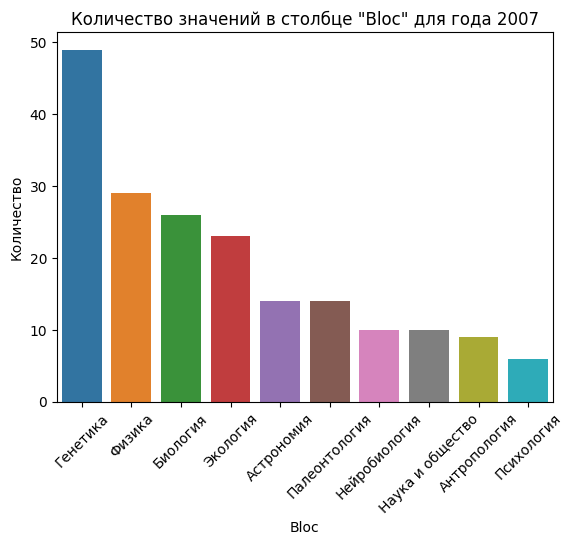

In [72]:
# Настройка графика
sns.barplot(x=bloc_counts.index, y=bloc_counts.values)
plt.xlabel('Bloc')
plt.ylabel('Количество')
plt.title('Количество значений в столбце "Bloc" для года 2007')
plt.xticks(rotation=45)
plt.show()

Посмотрим какое количество авторов писали на тему "Генетика" и сколько статей написал каждый автор

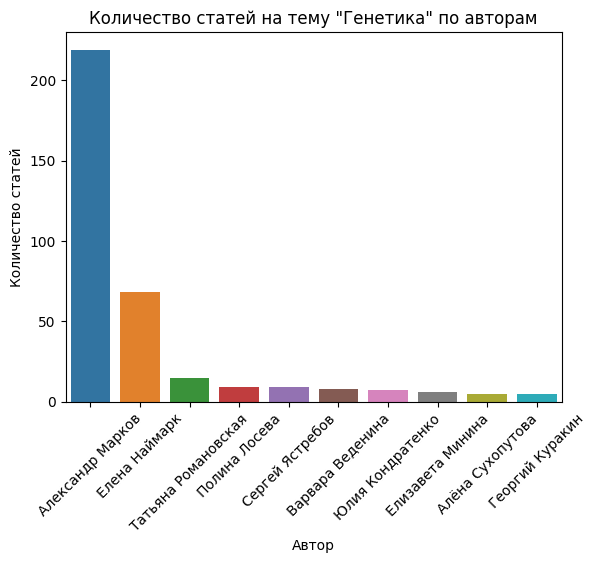

In [76]:
#Фильт для данных по теме "Генетика"
data_genetics = df_new[df_new['Bloc'] == 'Генетика']
#Количество статей, написанных каждым автором и топ 10
author_counts = data_genetics['Author'].value_counts().head(10)

sns.barplot(x=author_counts.index, y=author_counts.values)
plt.xlabel('Автор')
plt.ylabel('Количество статей')
plt.title('Количество статей на тему "Генетика" по авторам')
plt.xticks(rotation=45)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4ba64eee-adbd-4cac-b85b-af4dc8d991e4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>